In [61]:
import torch as tc
import numpy as np
import matplotlib.pyplot as plt
from gp_curves_gpu import GPCurvesReader
#from models.model import LatentModel
import torch
import sys, os, inspect
%matplotlib inline

# Dataset Initialization
# dataset_train = GPCurvesReader(batch_size=16, max_num_context=96, random_kernel_parameters=True)
dataset_test = GPCurvesReader(batch_size=30, max_num_context=6, testing=True, random_kernel_parameters=True)

In [80]:
#data_train = dataset_train.generate_curves()
data_test = dataset_test.generate_curves()

(context_x, context_y), target_x = data_test.query
target_y = data_test.target_y
context_x = context_x.cpu()
context_y = context_y.cpu()
target_x = target_x.cpu()
target_y = target_y.cpu()

mix_x = tc.cat([target_x, context_x], dim=1).cpu()
mix_y = tc.cat([target_y, context_y], dim=1).cpu()

In [81]:
data_dict = { 'data_test' : data_test}
tc.save(data_dict, './data_test11.pt')

In [69]:
data_test_fix = tc.load('./data_test2.pt')['data_test']

In [9]:
data_test_fix.target_y.shape

torch.Size([10, 395, 1])

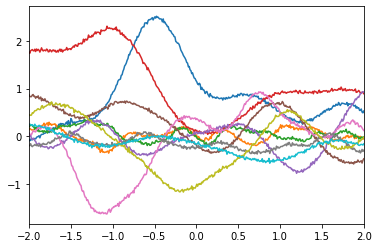

In [10]:
for i in range(target_x.size(0)):
    target_inds = tc.argsort(mix_x[i, :, 0])
    x = mix_x[i, target_inds, :]
    y = mix_y[i, target_inds, :]
    
    plt.plot(x.numpy(), y.numpy())
    plt.xlim(-2, 2)

In [11]:
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from models.model14 import NeuralProcessModel
from utils.utils import plot_functions

ModuleNotFoundError: No module named 'models.model14'; 'models' is not a package

In [15]:
hparams = dict(x_dim=1, y_dim=1, r_dim=128, z_dim=128, h_dim=128, use_det_path=True, use_lvar=False, enc=False, lenc=False, dec=True)
model = NeuralProcessModel(**hparams).cuda()
model.eval()

NameError: name 'NeuralProcessModel' is not defined

In [16]:
context_x = context_x.cuda()
context_y = context_y.cuda()
target_x = target_x.cuda()
target_y = target_y.cuda()

_, mse_loss, pred_log_likelihood, _, y_mean, y_std = model(context_x, context_y, target_x, target_y)

NameError: name 'model' is not defined

In [13]:
if not os.path.exists('ckpt'): os.makedirs('ckpt')
exp_dict = { 'model_state' : model.state_dict(), 'data_test' : data_test }
file_path = 'ckpt/' + 'exp_name' +'.pt'
torch.save(exp_dict, file_path)

NameError: name 'model' is not defined

In [14]:
file_path = 'ckpt/' + 'exp_name' +'.pt'
exp_load = torch.load(file_path)
#print(exp_load['model_state'])
#model.load_state_dict(exp_load['model_state'])
exp_load['data_test']

FileNotFoundError: [Errno 2] No such file or directory: 'ckpt/exp_name.pt'

In [70]:
r = model._deterministic_encoder(context_x, context_y).cuda()
r = r.unsqueeze(1).repeat(1, target_x.size(1),1)

mu_context, sigma_context, _ = model._latent_encoder(context_x, context_y)
q_context = tc.distributions.Normal(mu_context, sigma_context)

z_q = q_context.sample()
z_q = z_q.unsqueeze(1).repeat(1, target_x.size(1), 1)

y_mean, y_std, _ = model._decoder(target_x,z_q,r)

In [66]:
z_p = torch.randn((1, 128)).cuda() 
z_p = z_p.unsqueeze(1).repeat(1, target_x.size(1), 1)
y_mean, y_std, _ = model._decoder(target_x,z_p,r)

In [11]:
# Lets order the result, for plotting
target_inds = tc.argsort(target_x[0, :, 0])
target_x = target_x[:, target_inds, :]
target_y = target_y[:, target_inds, :]

context_inds = tc.argsort(context_x[0, :, 0])
context_y = context_y[:, context_inds, :]
context_x = context_x[:, context_inds, :]

y_mean = y_mean[:, target_inds, :]
y_std = y_std[:, target_inds, :]

title = 'testing'
global_step = 0
fig = plt.figure()
plt.title(f"{title}. Iter {global_step}")
plot_functions(target_x.detach().cpu().numpy(),
               target_y.detach().cpu().numpy(),
               context_x.detach().cpu().numpy(),
               context_y.detach().cpu().numpy(),
               y_mean.detach().cpu().numpy(),
               y_std.detach().cpu().numpy())
# plt.show()
# plt.close()

NameError: name 'y_mean' is not defined